Linear regression is the whereby relationships between a dependent and independent value is predicted based on how known/existing values fit on a straight line. The dependent value (y -axis) is what you want to predict and the independent values (x-axis) are the predictor values. Multiple linear regression also works on the assumption that the independent values do not influence each other. For example a linear regression model that uses owning an apple phone and using an i0S is not considered a good model because these two variables speak directly to each other in most cases.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import numpy as np

In [2]:
df = pd.read_csv("Assignment 2 - data Mashable.csv")
df.tail()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
24994,24995,http://mashable.com/2013/09/25/parkinsons-spoon/,9,342,9,0,4.628655,0,0,0,...,0,0,0,0,0.448753,0.250524,0.642857,0.214286,8500,3.929419
24995,24996,http://mashable.com/2013/05/20/esquire-weekly-...,6,243,1,0,5.111111,0,0,1,...,0,0,0,0,0.418081,0.206035,0.000000,0.000000,675,2.829304
24996,24997,http://mashable.com/2014/07/13/google-world-cu...,11,1334,4,4,4.613943,0,1,0,...,0,0,1,1,0.486041,0.102557,0.288889,-0.155556,1500,3.176091
24997,24998,http://mashable.com/2013/01/17/thinkpad-chrome...,7,263,1,0,4.749049,0,0,0,...,0,0,0,0,0.627143,0.387381,0.000000,0.000000,817,2.912222
24998,24999,http://mashable.com/2014/07/21/national-junk-f...,11,932,2,3,4.899142,0,0,0,...,0,0,0,0,0.404953,-0.005742,0.200000,-0.050000,1000,3.000000


In [18]:
#getting an overview of dataframe with describe
df.describe()

,id,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
count,24999.000000,24999.000000,24999.000000,24999.000000,24999.00000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,...,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000
mean,12500.000000,10.283531,547.052322,4.709988,1.24925,4.585351,0.054562,0.175527,0.162006,0.062082,...,0.143526,0.062082,0.069523,0.131605,0.448574,0.122113,0.278650,0.071327,3523.734229,3.254355
std,7216.734026,2.080625,473.431869,8.602473,4.08842,0.734695,0.227128,0.380425,0.368464,0.241310,...,0.350615,0.241310,0.254346,0.338068,0.109696,0.096567,0.322993,0.261615,13098.996472,0.408068
min,1.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,-1.000000,1.000000,0.000000
25%,6250.500000,9.000000,246.000000,1.000000,0.00000,4.481996,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.399175,0.062340,0.000000,0.000000,954.000000,2.979548
50%,12500.000000,10.000000,406.000000,1.000000,0.00000,4.663717,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.455556,0.122070,0.112500,0.000000,1500.000000,3.176091
75%,18749.500000,12.000000,713.000000,5.000000,1.00000,4.850842,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.510119,0.180353,0.500000,0.137500,2900.000000,3.462398
max,24999.000000,20.000000,7764.000000,128.000000,75.00000,8.041534,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.655000,1.000000,1.000000,843300.000000,5.925982


In [4]:
#drop null values from dataframe. This is a harsh method. Better perhaps to go by columns.
df.dropna()
len(df)  #no null values in the dataframe

24999

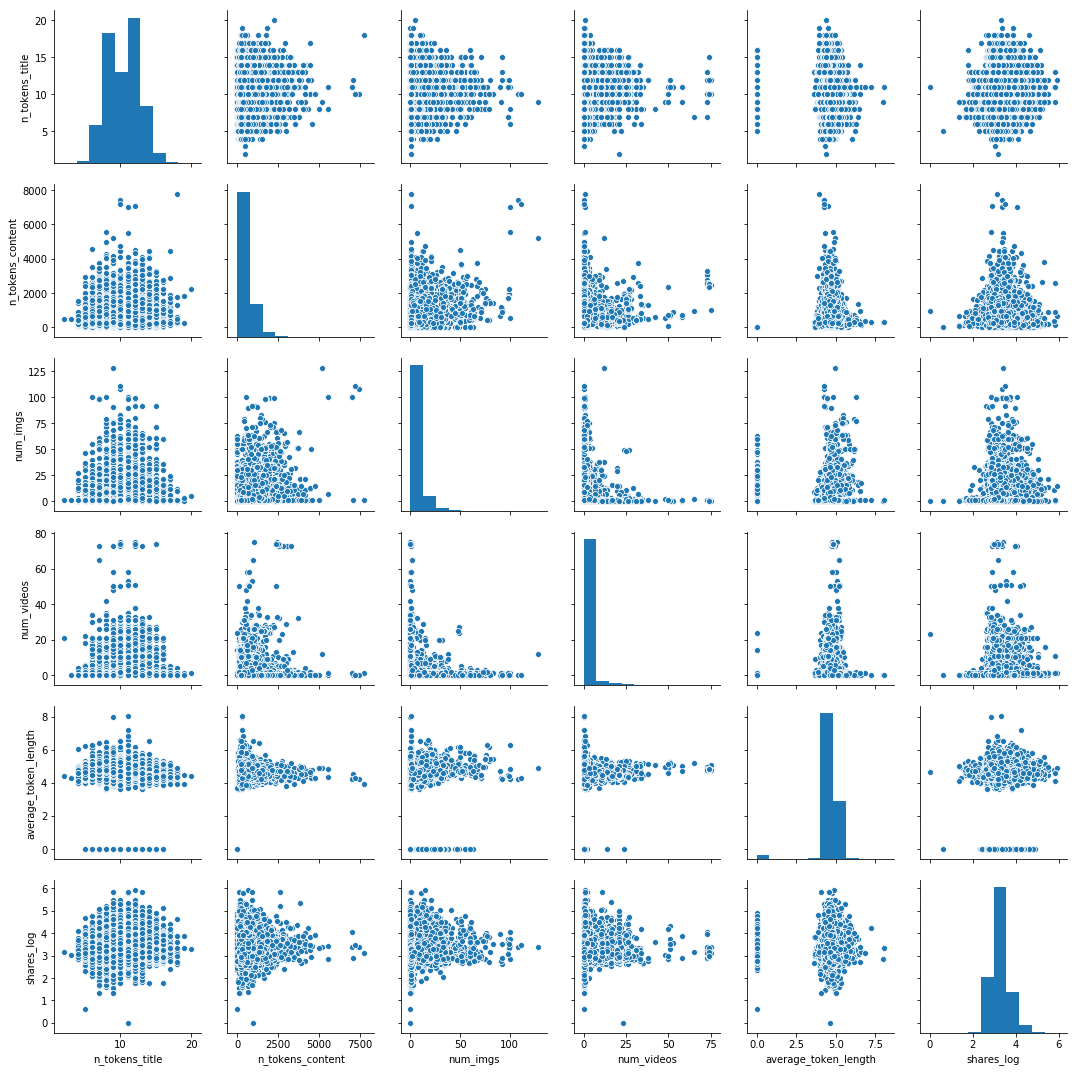

In [5]:
#create subsets to investigate relationship and check data trends
#first is subset is for the tokens
df_sub_token = df[["n_tokens_title", "n_tokens_content", "num_imgs", "num_videos", "average_token_length", "shares_log"]]
sns.pairplot(df_sub_token)
plt.show()

In [6]:
#need to do some more pre-processing and data clean up
df.average_token_length.value_counts().head()

0.000000    536
5.000000     54
4.500000     37
4.666667     36
4.600000     22
Name: average_token_length, dtype: int64

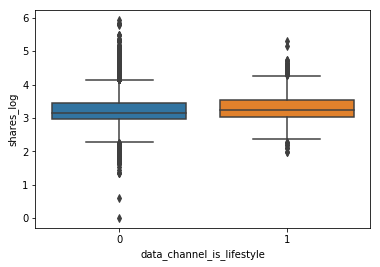

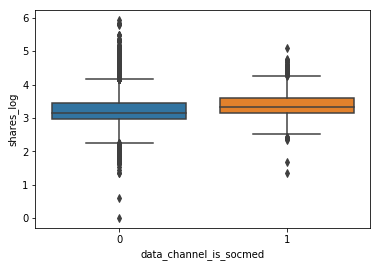

In [32]:
#shares log and type of channel...so need to convert these values and do value _counts to allow for insights...ditto for the days
sns.boxplot(x=df["data_channel_is_lifestyle"],y=df["shares_log"], data=df)
plt.show()
sns.boxplot(x=df["data_channel_is_socmed"],y=df["shares_log"], data=df)
plt.show()
# a lifestyle channel is slightly more likely to get more share than other channels

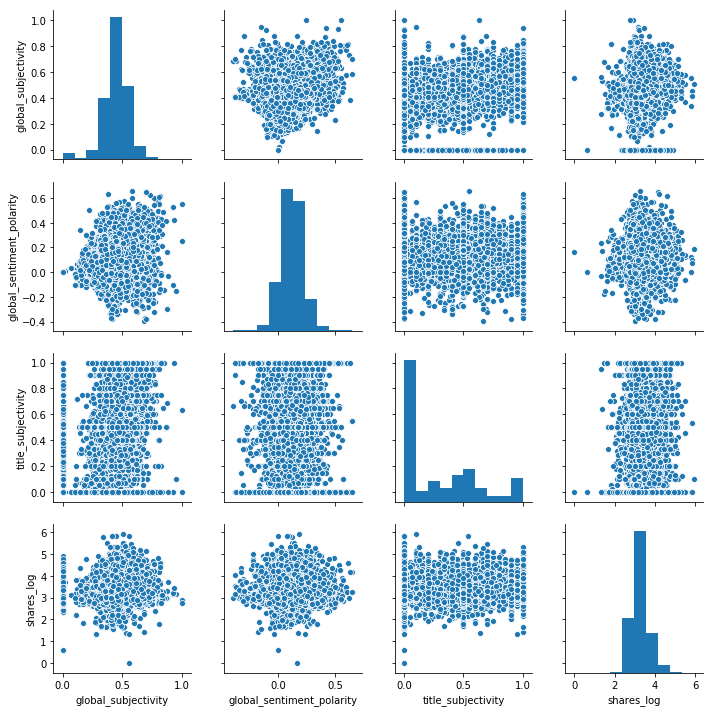

In [8]:
#looking at relationship between log shares and sentiment values
df_sub_senti = df[["global_subjectivity", "global_sentiment_polarity", "title_subjectivity", "shares_log"]]
sns.pairplot(df_sub_senti) 
#from this, global sentiment polarity and global seems to be loosely corrlated
# there are two distinct trends seen in global sbjectivity, from 0 on the axis there are two lines of inverse correlation
#that is negative glbal subjectivity results in bigger share AND positive glbal subjectivity also results in larger shares
#need a different kind of plot sinces it is binary...maybe bar or histogram

From the histogram of global subjectivity we can see that there are zero values.
the plot also shows the outliers in the zero column affecting the liinear regression
to improve the model. Should the values be filtered out or not?
Can global subjectivity really have zero values? What does this data capture?
According to Montoyo, MartíNez-Barco, & Balahur, A. (2012), subjectivity analysis deals with the detection of “private states” (opinions, emotions, sentiments, beliefs, speculations).
With this in mind it is plausible that zero just denotes a neutral 'subjectivity' and is a valid value, not superfluous. So they will be left in. However, some transformation is needed to capture the two distinct trendlines noticed.

In [ ]:
#globalsubjectivity transformation


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


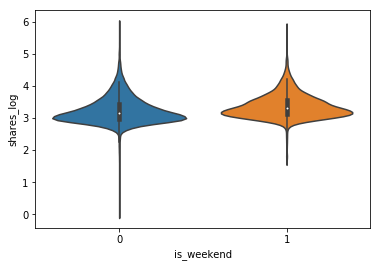

In [9]:
#check for weekdays versus weekends
sns.violinplot(x=df["is_weekend"],y=df["shares_log"], data=df)
plt.show()
#weeekends have higher shares and a smaller distribution than weekdays

In [10]:
#Create a dataframe with 5 independent variables of your choice. 
#Variables chosen sofar, data channel is lifestyle, global sentoment polarity, is weekend, img and video follow same lines so maybe combine, average token length
y = df['shares_log'] #we want to predict the number of shares and entry will get
X = df[["is_weekend","data_channel_is_socmed", "num_imgs", "global_sentiment_polarity", "global_subjectivity"]]
X.index = df['id'] #this stores the addresses of all the datapoints
X.head()

,is_weekend,data_channel_is_socmed,num_imgs,global_sentiment_polarity,global_subjectivity
id,,,,,
1,0,0,12,0.082486,0.439379
2,0,0,6,0.027715,0.300454
3,0,0,0,0.259120,0.575486
4,0,0,2,0.134424,0.327220
5,0,0,18,0.109256,0.507709


In [11]:
#Split the data into a test set and a train set
#split the data, store it into different variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
X_train.head() #The train data

,is_weekend,data_channel_is_socmed,num_imgs,global_sentiment_polarity,global_subjectivity
id,,,,,
20922,1,0,0,0.230736,0.451711
4486,0,0,9,0.078816,0.476976
17756,0,0,1,0.263511,0.488495
4705,0,0,23,0.052758,0.545746
13494,0,0,13,0.063513,0.507042


In [12]:
# create linear regression model with the trainin dataset
lm = LinearRegression() 
model = lm.fit(X_train, y_train)

In [13]:
#checking the coeeficients of each independent variable 
coef = pd.DataFrame(X.columns.values, lm.coef_) 
coef

,0
0.126812,is_weekend
0.132487,data_channel_is_socmed
0.003691,num_imgs
0.104033,global_sentiment_polarity
0.267308,global_subjectivity


In [36]:
intercept = lm.intercept_ #gets the intercept
intercept

3.078976689382886

In [14]:
#Evaluate model performance by calculating R^2 on the test set
y_predict = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train...
r2 = r2_score(y_test, y_predict)
print(f"The r-squared value is {r2:.3f}")  #expected to be between 0.05 and 0.08

The r-squared value is 0.033


In [15]:
#calculating the RSME
math.sqrt(mean_squared_error(y_test, y_predict))

0.39934938613048704

The variabes were selected using a combination of plotting methods and anaysing the relationships between the dependent variable and independent varables provided. Domain knowledge on viral videos predicted that lifestyle and social media videos are usually shared more. Both of these variables were plotted and social media inched ahead in tems of positive correlation. The sentiment analysis aspect was tricker and although it was observed that there were two opposiing otrends in global subjectivity, I could not transform the variable into a more useful values for the model. The weekend versus weekday question was also ansered by the violin plot and that variable was added to the model.

The linear regression formula is:
Y = B0 + B1*X1 + B2*X2 + B3*X3 + B4*X4 + B5*X5 + e.

The variables in the model are:

Y, dependent variable;
X1, first independent variable;
X2, second independent variable; and so on ...
e, the residual error, which is an unmeasured variable.
The parameters in the model are:

B0, the Y-intercept;
B1, first regression coefficient
B2, second regression coefficient; and so on...

With the actual values from the model, the formual looks like this:

$shares log =  3.078976689382886 + 0.126812 * is weekend + 0.132487 * data channel is socmed + 0.003691 * num imgs + 0.104033 * global sentiment polarity + 0.267308 * globalsubjectivity + e$


The predictive power of the model is quite weak with an r2 of 0.03 and RSME of 0.40
The training model explains only about 3% of observations in the test dataset.

The error margin is also quite high in my opinion. The predicted data off from actual log share by about 0.40. Although to be fair, with log values it is harder to analyse the residuals and draw conclusions on the usefulness of the model. Finally, predicting the viral potential of a post is notoriously hard. There maybe other variables not included that have a stronger correlation to the number of shares.

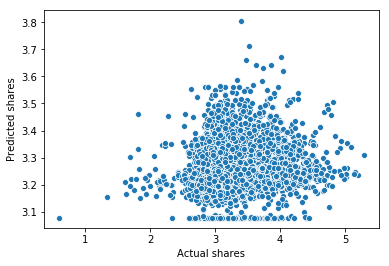

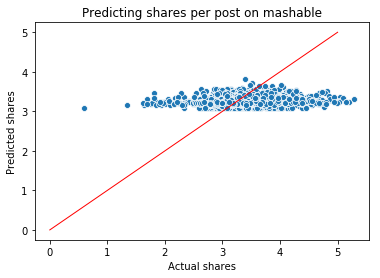

In [30]:
#Make a plot of the predicted price vs. the actual price. Which prices are predicted well?
#make sure the axis is set to zero
#multivariate regression
sns.scatterplot(y_test, y_predict)
plt.xlabel('Actual shares')
plt.ylabel('Predicted shares')
plt.show()

#drawing differnet plot for comparison
sns.scatterplot(y_test, y_predict)
plt.plot([0,5],[0,5], color="red", lw=1) #adding line that extends a bit beyond the upper values of plot
plt.xlabel('Actual shares')
plt.ylabel('Predicted shares')
plt.title('Predicting shares per post on mashable')
plt.show()

In [19]:
#generate predictions for the hold-out test data set  
df_ans = pd.read_csv("Assignment 2 - data Mashable to be predicted.csv")
df_ans.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares
0,25001,http://mashable.com/2013/11/04/bought-apartmen...,12,330,1,0,4.533333,0,0,0,...,0,0,0,0,0,0.366459,0.073390,0.000000,0.000000,NaN
1,25002,http://mashable.com/2013/03/13/get-in-car-ente...,10,501,1,0,4.319361,1,0,0,...,0,0,0,0,0,0.532966,0.213349,0.454545,0.136364,NaN
2,25003,http://mashable.com/2013/10/01/samsung-galaxy-...,10,2500,13,1,4.390000,0,0,0,...,0,0,0,0,0,0.498828,0.140832,0.500000,-0.100000,NaN
3,25004,http://mashable.com/2013/02/11/justin-timberla...,10,266,5,0,5.195489,0,1,0,...,0,0,0,0,0,0.476431,0.259596,0.600000,0.200000,NaN
4,25005,http://mashable.com/2014/06/05/nicolas-cage-pr...,11,735,0,16,4.571429,0,1,0,...,1,0,0,0,0,0.466519,0.050424,0.000000,0.000000,NaN


In [21]:
#predict shares log
x =df_ans[["is_weekend","data_channel_is_socmed", "num_imgs", "global_sentiment_polarity", "global_subjectivity"]]
df_ans["shares_log_pred"] = lm.predict(x)
df_ans.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log_pred
0,25001,http://mashable.com/2013/11/04/bought-apartmen...,12,330,1,0,4.533333,0,0,0,...,0,0,0,0,0.366459,0.073390,0.000000,0.000000,NaN,3.188260
1,25002,http://mashable.com/2013/03/13/get-in-car-ente...,10,501,1,0,4.319361,1,0,0,...,0,0,0,0,0.532966,0.213349,0.454545,0.136364,NaN,3.247329
2,25003,http://mashable.com/2013/10/01/samsung-galaxy-...,10,2500,13,1,4.390000,0,0,0,...,0,0,0,0,0.498828,0.140832,0.500000,-0.100000,NaN,3.274952
3,25004,http://mashable.com/2013/02/11/justin-timberla...,10,266,5,0,5.195489,0,1,0,...,0,0,0,0,0.476431,0.259596,0.600000,0.200000,NaN,3.251793
4,25005,http://mashable.com/2014/06/05/nicolas-cage-pr...,11,735,0,16,4.571429,0,1,0,...,0,0,0,0,0.466519,0.050424,0.000000,0.000000,NaN,3.208927


In [25]:
#transform share_log to share (antilog conversion)
df_ans['shares'] =10 ** df_ans["shares_log_pred"]
df_ans.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log_pred
0,25001,http://mashable.com/2013/11/04/bought-apartmen...,12,330,1,0,4.533333,0,0,0,...,0,0,0,0,0.366459,0.073390,0.000000,0.000000,1542.625023,3.188260
1,25002,http://mashable.com/2013/03/13/get-in-car-ente...,10,501,1,0,4.319361,1,0,0,...,0,0,0,0,0.532966,0.213349,0.454545,0.136364,1767.378116,3.247329
2,25003,http://mashable.com/2013/10/01/samsung-galaxy-...,10,2500,13,1,4.390000,0,0,0,...,0,0,0,0,0.498828,0.140832,0.500000,-0.100000,1883.442171,3.274952
3,25004,http://mashable.com/2013/02/11/justin-timberla...,10,266,5,0,5.195489,0,1,0,...,0,0,0,0,0.476431,0.259596,0.600000,0.200000,1785.634261,3.251793
4,25005,http://mashable.com/2014/06/05/nicolas-cage-pr...,11,735,0,16,4.571429,0,1,0,...,0,0,0,0,0.466519,0.050424,0.000000,0.000000,1617.807798,3.208927


In [31]:
#create a csv file with all variables, including the predictors. Upload this file with your assignment.
df_ans.to_csv("Assignment 2 - Mashable predicted.csv", index = False, sep=',', encoding='utf-8')